In [64]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as f
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
from typing import Optional, Union, Type, List, Dict

In [65]:
torch.set_default_dtype(torch.double)

In [66]:
df = pd.read_csv("../dataset/electricity.csv")

X = torch.tensor(df["1"].to_numpy())

X = X[:1024]

X.shape

torch.Size([1024])

In [67]:
X.unsqueeze(1)

tensor([[ 69.],
        [ 92.],
        [ 96.],
        ...,
        [158.],
        [133.],
        [123.]])

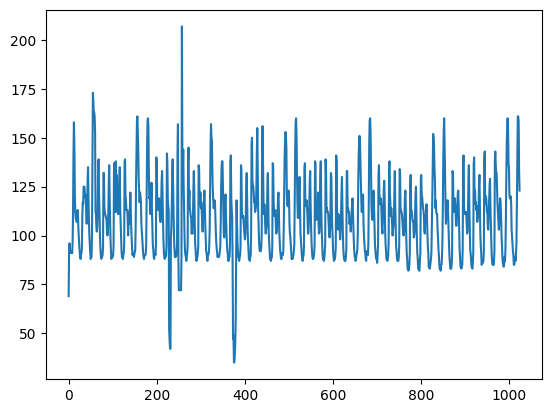

In [68]:
plt.plot(X)

In [69]:
P = 64
F = 16
N = len(X)
N_test = F
N_train = N - N_test
N_train, N_test

(1008, 16)

In [70]:
X_train = X[:N_train]
X_test = X[:N_test]

In [71]:
class MyDataset(Dataset):

    def __init__(self, P, F, values):
        self.P = P
        self.F = F
        self.values = values

    def __getitem__(self, index):
        X_S = self.values[index : index + self.P]
        Y_S = self.values[index + self.P : index + self.P + self.F]
        return X_S, Y_S

    def __len__(self):
        return len(self.values) - self.P - self.F + 1


dataset = MyDataset(P, F, X_train)

In [72]:
loss_list = []
model = nn.Linear(P, F)
crit = nn.MSELoss()
optim = torch.optim.Adam(model.parameters())

  0%|          | 0/150 [00:00<?, ?it/s]

437.5700454357426

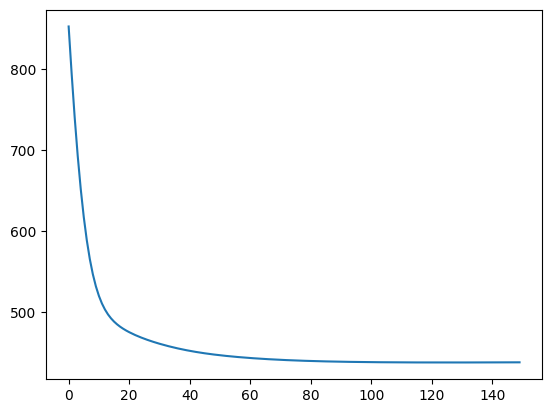

In [73]:
for epoch in tqdm(range(150)):
    loss: torch.Tensor
    for X_batch, Y_batch in DataLoader(dataset, batch_size=12):
        X_batch = X_batch
        Y_batch = Y_batch
        optim.zero_grad()
        Y_batch_pred = model(X_batch)
        loss = crit(Y_batch, Y_batch_pred)
        loss.backward()
        optim.step()
    loss_list.append(loss.item())

plt.plot(loss_list)
loss_list[-1]

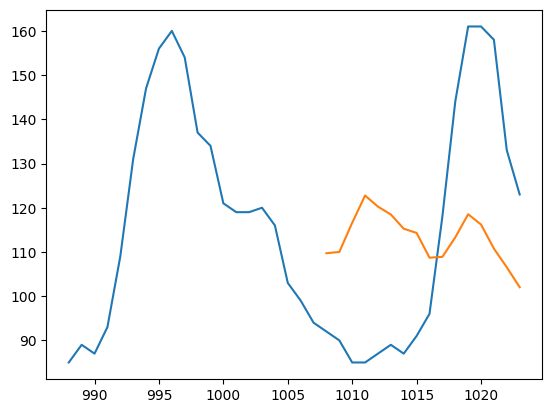

In [79]:
plt.plot(torch.arange(N_train - 20, N), X[N_train - 20 : N])
plt.plot(torch.arange(N_train, N), Y_batch_pred.detach()[-1])